In [ ]:
import json

import pandas as pd
import numpy as np
  
from pandas.io.json import json_normalize 

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

pd.set_option('display.max_colwidth', 100)

In [ ]:

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_diccionario = 
pd.read_csv('/content/drive/MyDrive/Data Viz/Diccionario de datos ILE.csv')


In [ ]:
df_diccionario

,Variable,Descripción,Tipo de dato
0,año,Año en que se realizó el procedimiento,numérico
1,mes,Mes en que se realizó el procedimiento,texto
2,clues_hospital,Clave Única de Establecimientos de Salud (CLUES),texto
3,fingreso,Fecha de Interrupción Legal del Embarazo,fecha
4,autoref,Especificar si la paciente es referida de otra unidad o acude directamente,texto
5,edocivil_descripcion,Estado civil,texto
6,edad,Edad cumplida en años,numérico
7,desc_derechohab,Especificar la institución que otorga la derechohabiencia,texto
8,nivel_edu,Último nivel escolar acreditado,texto
9,ocupacion,Ocupación,texto


In [ ]:
df = pd.read_json('/content/drive/MyDrive/Data Viz/interrupcion-legal-del-embarazo-20201204.json')

In [ ]:
df.head()

,datasetid,recordid,fields,record_timestamp
0,interrupcion-legal-del-embarazo,2d9c3f29c181d9898b26287dbfa3e4da25b8d1f2,"{'entidad': 'ESTADO DE MEXICO', 'p_semgest': 11, 'npartos': 2, 'fsexual': 17, 'c_dolor': 'SI', '...",2020-11-06T14:04:53.972-06:00
1,interrupcion-legal-del-embarazo,614246090a6cb3a4c9dad821488229a211070480,"{'entidad': 'CIUDAD DE MEXICO', 'p_semgest': 10, 'npartos': 1, 'fsexual': 18, 'c_dolor': 'SI', '...",2020-11-06T14:04:53.972-06:00
2,interrupcion-legal-del-embarazo,68f74d2f7ffc8d5c610031b916d4f975e64814f5,"{'entidad': 'ESTADO DE MEXICO', 'p_semgest': 11, 'npartos': 1, 'fsexual': 15, 'c_dolor': 'SI', '...",2020-11-06T14:04:53.972-06:00
3,interrupcion-legal-del-embarazo,c263812d37b829ddca5872d8666bf810f2d0fd4f,"{'entidad': 'CIUDAD DE MEXICO', 'p_semgest': 8, 'npartos': 0, 'fsexual': 16, 'c_dolor': 'SI', 'c...",2020-11-06T14:04:53.972-06:00
4,interrupcion-legal-del-embarazo,6b7be3c45587aa0a7db6659c179e5d408352b495,"{'entidad': 'PUEBLA', 'p_semgest': 7, 'npartos': 0, 'fsexual': 17, 'c_dolor': 'SI', 'clues_hospi...",2020-11-06T14:04:53.972-06:00


In [ ]:
df = json_normalize(df.fields)
df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,entidad,p_semgest,npartos,fsexual,c_dolor,clues_hospital,desc_derechohab,c_num,ncesarea,consejeria,ocupacion,fingreso,ano,religion,procile_simplificada,parentesco,edad,h_fingreso,tanalgesico,c_fecha,autoref,desc_servicio,p_consent,sememb,gesta,cconsejo,mes,fmenstrua,anticonceptivo,nhijos,fecha_cierre,menarca,s_complica,h_fegreso,edocivil_descripcion,nivel_edu,nile,procile,p_diasgesta,resultado_ile,motiles,naborto,panticoncep,alc_o_municipio
0,ESTADO DE MEXICO,11.0,2.0,17.0,SI,DFSSA000065,NINGUNO,2,0.0,SI,EMPLEADA,2019-03-05,2019,CATOLICA,MEDICAMENTO,FAMILIAR MUJER,36.0,2019-03-04,SI,2019-03-01,SI,SALUD REPRODUCTIVA,SI,11.0,4.0,SI,MARZO,2018-12-22,CONDON,2.0,NA,15.0,NO,2019-03-04,SOLTERA,PRIMARIA,0,ameu + misoprostol,0.0,NA,INTERRUPCION VOLUNTARIA,1.0,CONDON + IMPLANTE SUBDERMICO,TEPOTZOTLAN
1,CIUDAD DE MEXICO,10.0,1.0,18.0,SI,DFSSA000065,NO ESPECIFICADO,2,0.0,SI,TRABAJADORA DEL HOGAR NO REMUNERADA,2019-03-08,2019,NINGUNA,MEDICAMENTO,PAREJA,27.0,2019-03-05,SI,2019-03-04,SI,SALUD REPRODUCTIVA,SI,9.0,2.0,SI,MARZO,2018-12-24,CONDON,1.0,NA,15.0,NO,2019-03-05,UNION LIBRE,PREPARATORIA,0,ameu + misoprostol,1.0,NA,INTERRUPCION VOLUNTARIA,0.0,CONDON + IMPLANTE SUBDERMICO,AZCAPOTZALCO
2,ESTADO DE MEXICO,11.0,1.0,15.0,SI,DFSSA000065,NINGUNO,2,0.0,SI,DESEMPLEADA,2019-03-08,2019,OTRA,MEDICAMENTO,FAMILIAR MUJER,26.0,2019-03-08,SI,2019-03-06,SI,SALUD REPRODUCTIVA,SI,11.0,3.0,SI,MARZO,2018-11-19,IMPLANTE SUBDERMICO,1.0,NA,12.0,NO,2019-03-08,SOLTERA,PREPARATORIA,0,ameu + misoprostol,0.0,NA,INTERRUPCION VOLUNTARIA,1.0,CONDON + IMPLANTE SUBDERMICO,TULTITLAN
3,CIUDAD DE MEXICO,8.0,0.0,16.0,SI,DFSSA000065,IMSS,2,1.0,SI,TRABAJADORA DEL HOGAR NO REMUNERADA,2019-03-08,2019,CATOLICA,MEDICAMENTO,PAREJA,32.0,2019-03-08,SI,2019-03-07,SI,SALUD REPRODUCTIVA,SI,8.0,3.0,SI,MARZO,2019-01-17,CONDON,1.0,NA,11.0,NO,2019-03-08,UNION LIBRE,LICENCIATURA,0,ameu + misoprostol,0.0,NA,INTERRUPCION VOLUNTARIA,1.0,CONDON + DIU,GUSTAVO A. MADERO
4,PUEBLA,7.0,0.0,17.0,SI,DFSSA000065,NINGUNO,NA,0.0,SI,ESTUDIANTE,2019-03-08,2019,CATOLICA,MEDICAMENTO,FAMILIAR MUJER,17.0,2019-03-08,SI,2019-03-08,SI,SALUD REPRODUCTIVA,SI,7.0,1.0,SI,MARZO,2019-01-14,NINGUNO,0.0,NA,12.0,NO,2019-03-08,SOLTERA,SECUNDARIA,0,misoprostol,0.0,NA,INTERRUPCION VOLUNTARIA,0.0,CONDON + IMPLANTE SUBDERMICO,NA
5,CIUDAD DE MEXICO,9.0,0.0,19.0,SI,DFSSA000065,NO ESPECIFICADO,2,1.0,SI,EMPLEADA,2019-03-13,2019,NINGUNA,MEDICAMENTO,FAMILIAR HOMBRE,35.0,2019-03-07,SI,2019-03-05,SI,SALUD REPRODUCTIVA,SI,7.0,2.0,SI,MARZO,2019-01-07,CONDON,1.0,NA,12.0,NO,2019-03-07,SOLTERA,LICENCIATURA,0,ameu + misoprostol,3.0,NA,INTERRUPCION VOLUNTARIA,0.0,CONDON + DIU,GUSTAVO A. MADERO
6,CIUDAD DE MEXICO,10.0,0.0,20.0,SI,DFSSA017886,OTRA,NA,0.0,SI,DESEMPLEADA,2019-07-17,2019,NINGUNA,MEDICAMENTO,NA,29.0,2019-07-17,SI,NA,NO,GINECO OBSTETRICIA,SI,10.0,1.0,SI,JULIO,2019-05-08,CONDON,0.0,NA,13.0,NO,2019-08-15,NA,LICENCIATURA,0,mife 100 + miso 800,0.0,NA,INTERRUPCION VOLUNTARIA,0.0,CONDON,ALVARO OBREGON
7,CIUDAD DE MEXICO,7.0,0.0,19.0,SI,DFSSA017886,IMSS,NA,0.0,SI,ESTUDIANTE,2019-08-06,2019,CATOLICA,MEDICAMENTO,NA,19.0,2019-08-05,SI,NA,NA,GINECO OBSTETRICIA,SI,7.0,1.0,SI,AGOSTO,2019-06-29,CONDON,0.0,NA,12.0,NO,2019-08-20,SOLTERA,LICENCIATURA,0,miso 1600 mcg,3.0,NA,INTERRUPCION VOLUNTARIA,0.0,CONDON,MAGDALENA CONTRERAS
8,CIUDAD DE MEXICO,8.0,0.0,18.0,SI,DFSSA017886,SEGURO POPULAR,NA,0.0,SI,EMPLEADA,2019-08-08,2019,NINGUNA,MEDICAMENTO,NA,23.0,2019-08-08,SI,NA,NA,GINECO OBSTETRICIA,SI,7.0,1.0,SI,AGOSTO,2019-06-15,CONDON,0.0,NA,14.0,NO,2019-08-23,SOLTERA,PREPARATORIA,0,"mifepristona 200mg vía oral; misoprostol 800mcg vía bucal (en 24).,",1.0,NA,INTERRUPCION VOLUNTARIA,0.0,CONDON + PASTILLA ANTICONCEPTIVA,ALVARO OBREGON
9,ESTADO DE MEXICO,8.0,0.0,17.0,NO,DFSSA003915,NINGUNO,NA,1.0,SI,ESTUDIANTE,2019-10-14,2019,NINGUNA,MEDICAMENTO,NA,30.0,2019-10-14,NO,NA,NA,ILE,NA,8.0,2.0,NO,OCTUBRE,2019-08-26,PARCHES,1.0,NA,10.0,NO,2019-11-01,UNION LIBRE,PREPARATORIA,1,misoprostol88mcg sublingual+ 800 mcg sl a las 4hrs(4x4),0.0,NA,INTERRUPCION VOLUNTARIA,0.0,I

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76744 entries, 0 to 76743
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entidad               76744 non-null  object 
 1   p_semgest             76714 non-null  float64
 2   npartos               72241 non-null  float64
 3   fsexual               72979 non-null  float64
 4   c_dolor               76744 non-null  object 
 5   clues_hospital        76744 non-null  object 
 6   desc_derechohab       76744 non-null  object 
 7   c_num                 76744 non-null  object 
 8   ncesarea              71802 non-null  float64
 9   consejeria            76744 non-null  object 
 10  ocupacion             76744 non-null  object 
 11  fingreso              76744 non-null  object 
 12  ano                   76744 non-null  object 
 13  religion              76744 non-null  object 
 14  procile_simplificada  76744 non-null  object 
 15  parentesco         

In [ ]:
df.shape

(76744, 44)

In [ ]:
# Hay que tener mucho cuidado aquí estoy reemplazando un NA que viene desde la base de datos
# pero esto va a inflar los 0 dentro de está columna que son relevantes 

df['nile'] = df['nile'].replace('NA', 0)

In [ ]:
df = df.astype({'nile':'int32'})

In [ ]:
motivos = df['motiles'].unique()
motivos

array(['INTERRUPCION VOLUNTARIA', 'VIOLACION', 'PROYECTO DE VIDA',
       'PROBLEMAS DE SALUD', 'SITUACION ECONOMICA', 'NA',
       'FALLA DEL METODO', 'DECISIONES VÍNCULADAS CON LA PAREJA', 'OTRA',
       'SIN APOYO'], dtype=object)

In [ ]:
estado_civil = df['edocivil_descripcion'].unique()
estado_civil

array(['SOLTERA', 'UNION LIBRE', 'NA', 'SEPARADA', 'VIUDA', 'CASADA',
       'DIVORCIADA'], dtype=object)

In [ ]:
df.isnull().sum()

entidad                     0
p_semgest                  30
npartos                  4503
fsexual                  3765
c_dolor                     0
clues_hospital              0
desc_derechohab             0
c_num                       0
ncesarea                 4942
consejeria                  0
ocupacion                   0
fingreso                    0
ano                         0
religion                    0
procile_simplificada        0
parentesco                  0
edad                        1
h_fingreso              67252
tanalgesico                 0
c_fecha                     0
autoref                     0
desc_servicio               1
p_consent                   0
sememb                   6170
gesta                    2960
cconsejo                    0
mes                         0
fmenstrua                   0
anticonceptivo              0
nhijos                  11539
fecha_cierre                0
menarca                  3926
s_complica                  0
h_fegreso 

In [ ]:
df['nhijos'].unique()

array([ 2.,  1.,  0.,  4.,  3.,  6.,  7.,  5., nan,  9.,  8., 10.])

In [ ]:
df['ocupacion'].unique()

array(['EMPLEADA', 'TRABAJADORA DEL HOGAR NO REMUNERADA', 'DESEMPLEADA',
       'ESTUDIANTE', 'NO ESPECIFICADO', 'NA'], dtype=object)

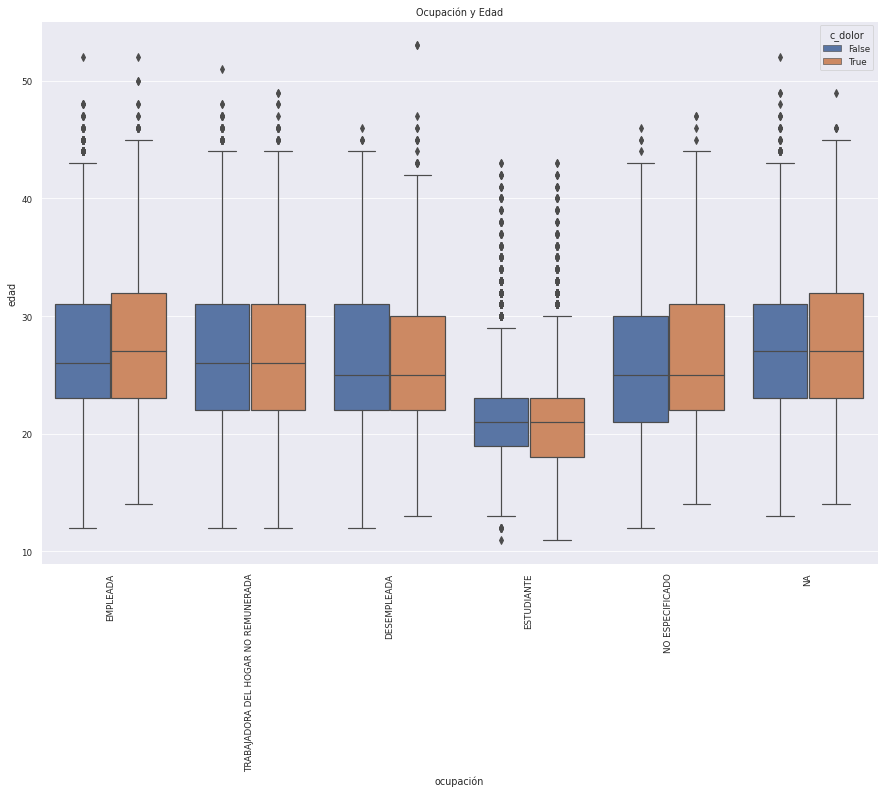

In [ ]:
sns.set(context = 'paper', style = 'darkgrid', rc={'figure.figsize':(15, 10)})
ax = sns.boxplot(x = df['ocupacion'], y = df['edad'], hue = df['c_dolor'] != 'NA')
ax.set_title("Ocupación y Edad")
ax.set(xlabel='ocupación', ylabel='edad')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

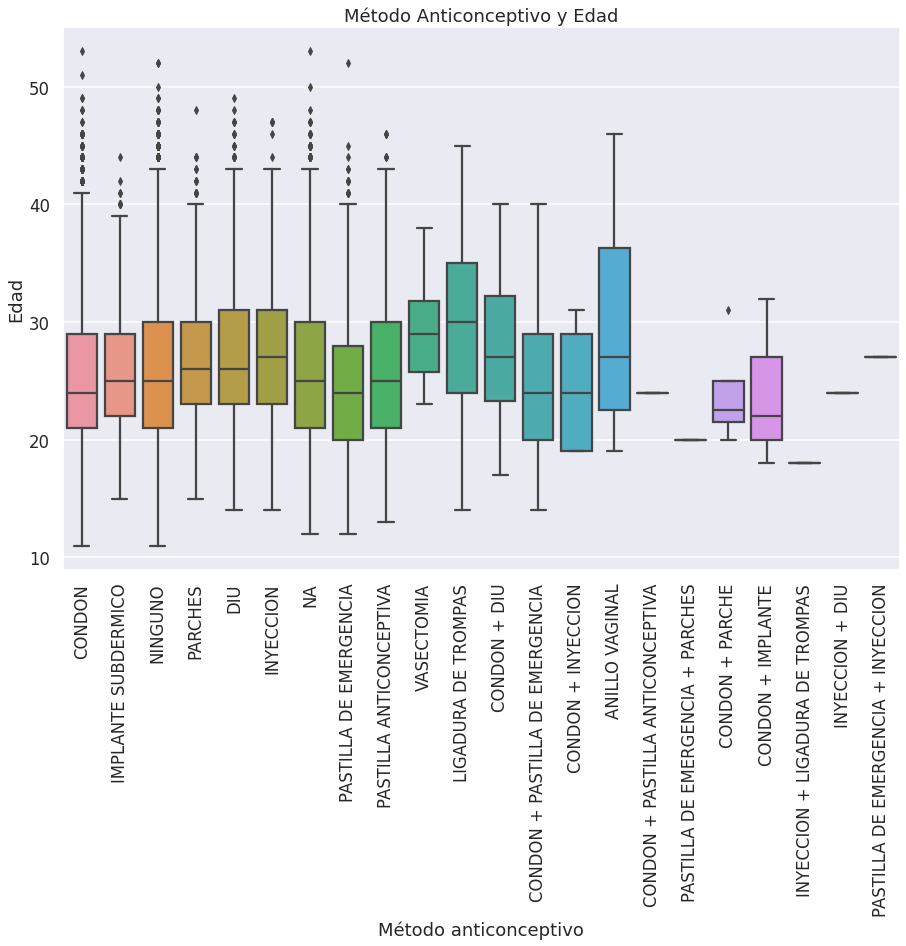

In [ ]:
sns.set(context = 'talk', style = 'darkgrid', rc={'figure.figsize':(15, 10)})
ax = sns.boxplot(x = df['anticonceptivo'], y = df['edad'])
ax.set_title("Método Anticonceptivo y Edad")
ax.set(xlabel='Método anticonceptivo', ylabel='Edad')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

''

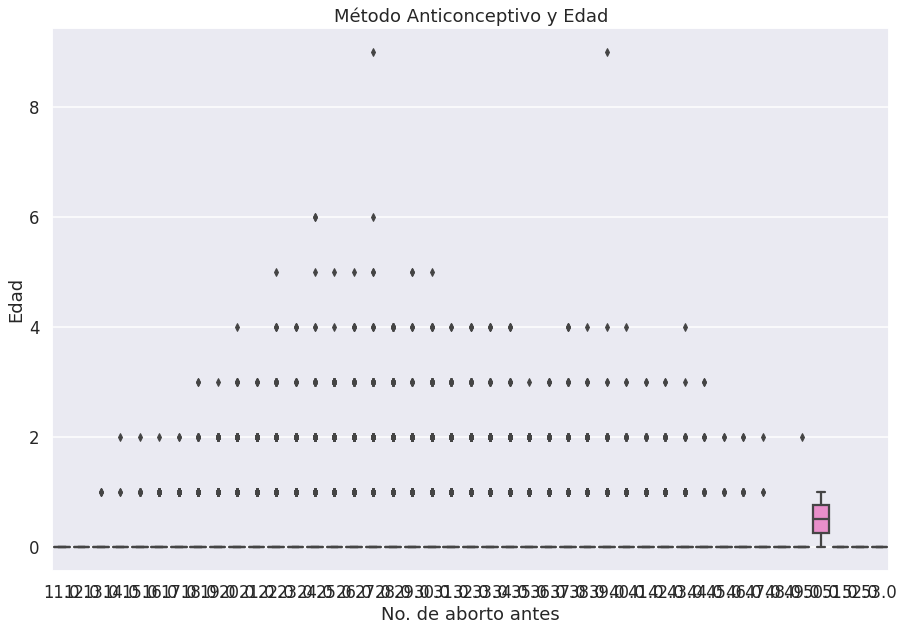

In [ ]:
sns.set(context = 'talk', style = 'darkgrid', rc={'figure.figsize':(15, 10)})

ax = sns.boxplot(x = df['edad'], y = df['nile'].sort_values())

ax.set_title("Método Anticonceptivo y Edad")
ax.set(xlabel='No. de aborto antes', ylabel='Edad')
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
;

In [ ]:
df['nile'].value_counts()

0    67098
1     8102
2     1276
3      202
4       52
5        9
6        3
9        2
Name: nile, dtype: int64

In [ ]:
df['ano'].value_counts()

2016    18080
2017    17597
2018    17178
2019    15241
2020     8647
NA          1
Name: ano, dtype: int64

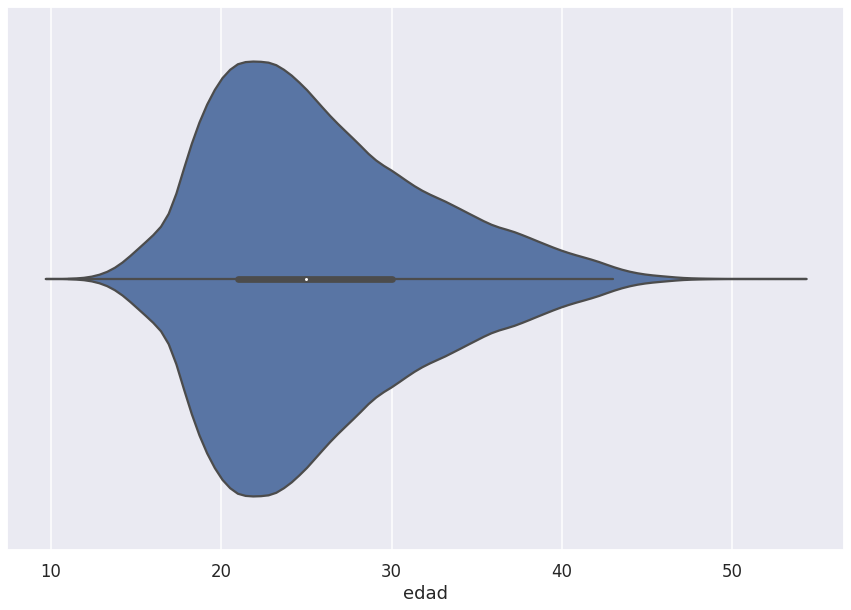

In [ ]:
sns.violinplot(data = df, x = 'edad')
#sns.swarmplot(data = df, x = 'edad');

In [ ]:
df['nile'].unique()

array([0, 1, 2, 3, 9, 4, 6, 5], dtype=int32)

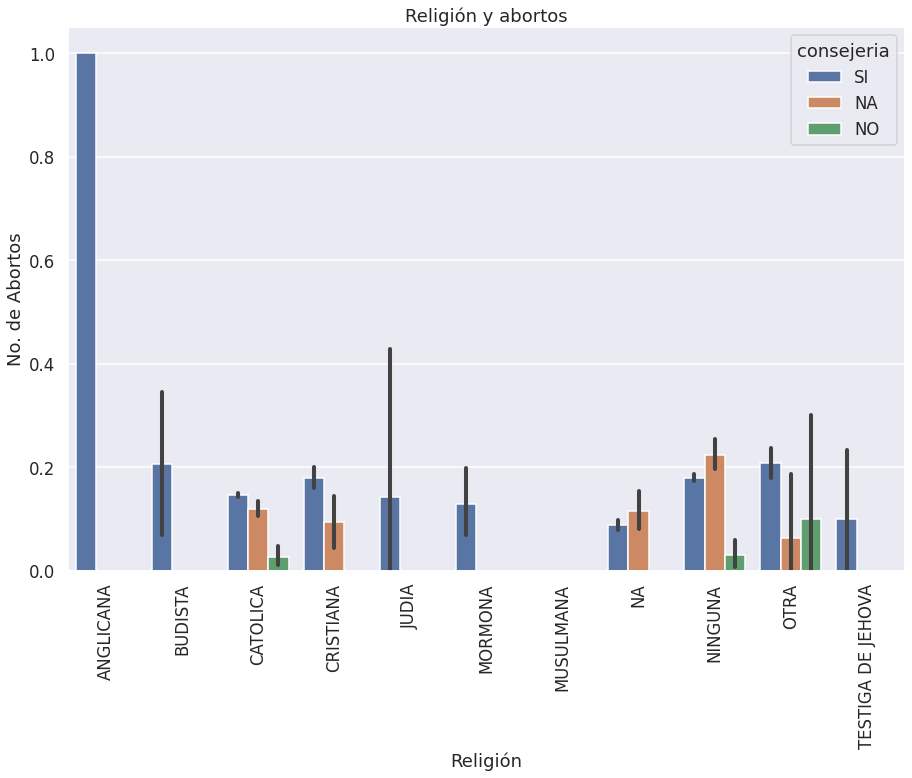

In [ ]:
ax = sns.barplot(data = df, x = df['religion'].sort_values(), y = df['nile'], hue = df['consejeria'])

ax.set_title("Religión y abortos")
ax.set(xlabel='Religión', ylabel='No. de Abortos')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

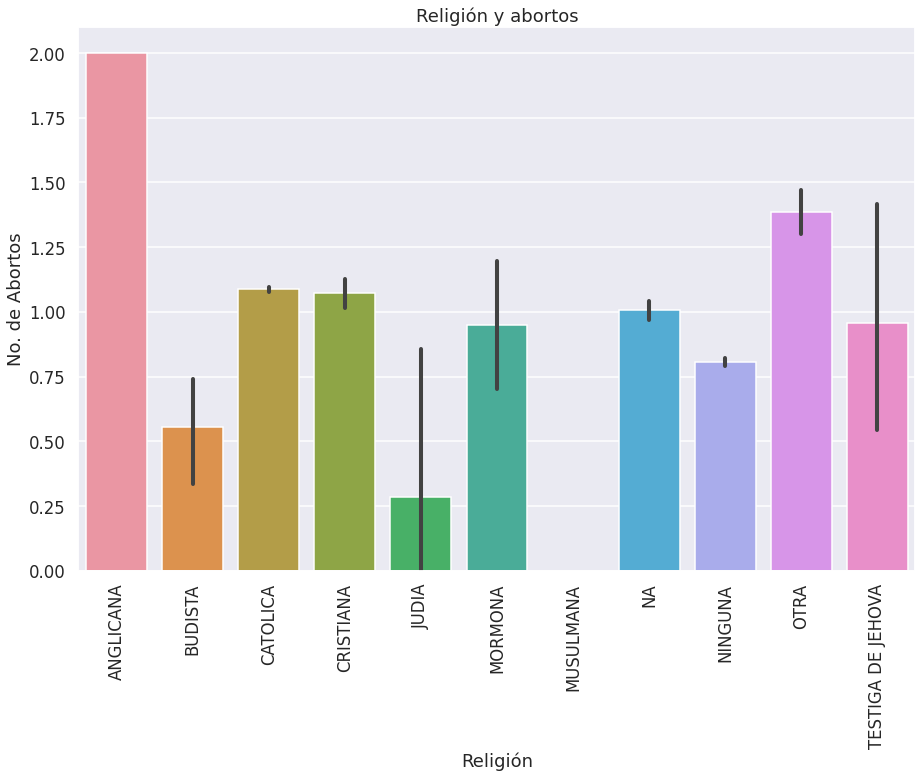

In [ ]:
sns.set_context()
ax = sns.barplot(data = df, x = df['religion'].sort_values(), y = df['nhijos'])

ax.set_title("Religión y abortos")
ax.set(xlabel='Religión', ylabel='No. de Abortos')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
 pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Data Viz/Data.csv')

In [ ]:
df_1.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 25
0,Afghanistan,AFG,Economic Fitness Metric,EF.EFM.OVRL.XD,0.069,0.064,0.219,0.088,0.141,0.232,0.272,0.193,0.235,0.194,0.312,0.194,0.145,0.208,0.622,0.311,0.100,0.078,0.102,0.053,0.054,nan
1,Afghanistan,AFG,"Economic Fitness Ranking (1 = high, 149 = low)",EF.EFM.RANK.XD,99.000,106.000,81.000,108.000,99.000,86.000,86.000,96.000,89.000,90.000,84.000,92.000,99.000,91.000,67.000,83.000,105.000,106.000,101.000,112.000,112.000,nan
2,Angola,AGO,Economic Fitness Metric,EF.EFM.OVRL.XD,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
3,Angola,AGO,"Economic Fitness Ranking (1 = high, 149 = low)",EF.EFM.RANK.XD,147.000,147.000,146.000,146.000,146.000,146.000,146.000,146.000,147.000,147.000,148.000,149.000,147.000,148.000,148.000,148.000,148.000,147.500,148.000,147.000,146.000,nan
4,Albania,ALB,Economic Fitness Metric,EF.EFM.OVRL.XD,0.190,0.440,0.376,0.431,0.450,0.549,0.465,0.473,0.581,0.495,0.495,0.461,0.482,0.868,0.891,0.426,0.413,0.429,0.424,0.342,0.375,nan
5,Albania,ALB,"Economic Fitness Ranking (1 = high, 149 = low)",EF.EFM.RANK.XD,75.000,68.000,74.000,70.000,71.000,63.000,70.000,72.000,67.000,66.000,74.000,72.000,74.000,55.000,54.000,73.000,68.000,71.000,68.000,72.000,73.000,nan
6,Andorra,AND,Economic Fitness Metric,EF.EFM.OVRL.XD,0.660,0.656,0.853,0.856,0.763,0.855,0.943,0.808,0.691,0.728,0.683,0.788,0.907,0.751,0.640,0.466,0.231,0.619,0.300,0.181,0.369,nan
7,Andorra,AND,"Economic Fitness Ranking (1 = high, 149 = low)",EF.EFM.RANK.XD,51.000,55.000,51.000,52.000,54.000,52.000,47.000,55.000,60.000,59.000,60.000,55.000,53.000,59.000,65.000,70.000,87.000,63.000,77.000,88.000,74.000,nan
8,United Arab Emirates,ARE,Economic Fitness Metric,EF.EFM.OVRL.XD,0.106,0.129,0.165,0.346,0.342,0.297,0.308,0.366,0.361,0.482,0.678,0.213,0.676,0.454,0.186,0.570,0.398,0.140,0.183,0.181,0.344,nan
9,United Arab Emirates,ARE,"Economic Fitness Ranking (1 = high, 149 = low)",EF.EFM.RANK.XD,86.000,88.000,88.000,77.000,75.000,79.000,80.000,80.000,80.000,67.000,61.000,89.000,64.000,73.000,93.000,66.000,71.000,97.000,89.000,87.000,76.000,nan


In [ ]:
df_1['Country Name'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Brunei Darussalam', 'Bhutan', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Costa Rica', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark',
       'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia, The',
       'Guinea-Bissau', 'Greece', 'Greenland', 'Guatemala', 'Guyana',
       'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iran, Islamic Rep.', 'Iraq', 'Iceland', 'Israel', 'Italy',


In [ ]:
mexico = df_1[df_1['Country Name'] == 'Mexico']

In [ ]:
mexico

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 25
172,Mexico,MEX,Economic Fitness Metric,EF.EFM.OVRL.XD,1.889,1.678,1.838,1.738,1.752,1.728,1.866,1.732,1.812,1.799,1.764,1.746,1.665,1.611,1.514,1.650,1.734,1.715,1.868,1.673,1.536,nan
173,Mexico,MEX,"Economic Fitness Ranking (1 = high, 149 = low)",EF.EFM.RANK.XD,21.000,26.000,25.000,26.000,25.000,26.000,25.000,26.000,25.000,26.000,24.000,25.000,26.000,31.000,34.000,32.000,29.000,31.000,27.000,31.000,33.000,nan


In [ ]:
indicator = mexico['Indicator Code'].to_list()

In [ ]:
indicator

['EF.EFM.OVRL.XD', 'EF.EFM.RANK.XD']

In [ ]:
mexico = mexico.drop(columns= ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

In [ ]:
mexico

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 25
172,1.889,1.678,1.838,1.738,1.752,1.728,1.866,1.732,1.812,1.799,1.764,1.746,1.665,1.611,1.514,1.650,1.734,1.715,1.868,1.673,1.536,nan
173,21.000,26.000,25.000,26.000,25.000,26.000,25.000,26.000,25.000,26.000,24.000,25.000,26.000,31.000,34.000,32.000,29.000,31.000,27.000,31.000,33.000,nan


In [ ]:
mexico = mexico.transpose()

In [ ]:
mexico.reset_index(inplace = True)

In [ ]:
mexico.columns

Index(['index', 172, 173], dtype='object')

In [ ]:
mexico.rename({'index': 'Years', 172: indicator[0], 173: indicator[1]}, axis = 1, inplace = True)

In [ ]:
mexico

,Years,EF.EFM.OVRL.XD,EF.EFM.RANK.XD
0,1995,1.889,21.000
1,1996,1.678,26.000
2,1997,1.838,25.000
3,1998,1.738,26.000
4,1999,1.752,25.000
5,2000,1.728,26.000
6,2001,1.866,25.000
7,2002,1.732,26.000
8,2003,1.812,25.000
9,2004,1.799,26.000


In [ ]:
fig = px.bar(mexico, x = 'Years', y = 'EF.EFM.OVRL.XD', color = 'EF.EFM.RANK.XD')
fig.show()

In [ ]:
data = px.data.gapminder()
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.101,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981,AFG,4


In [ ]:
data['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
data = pd.DataFrame(data = data['data'], columns= data['feature_names'])

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


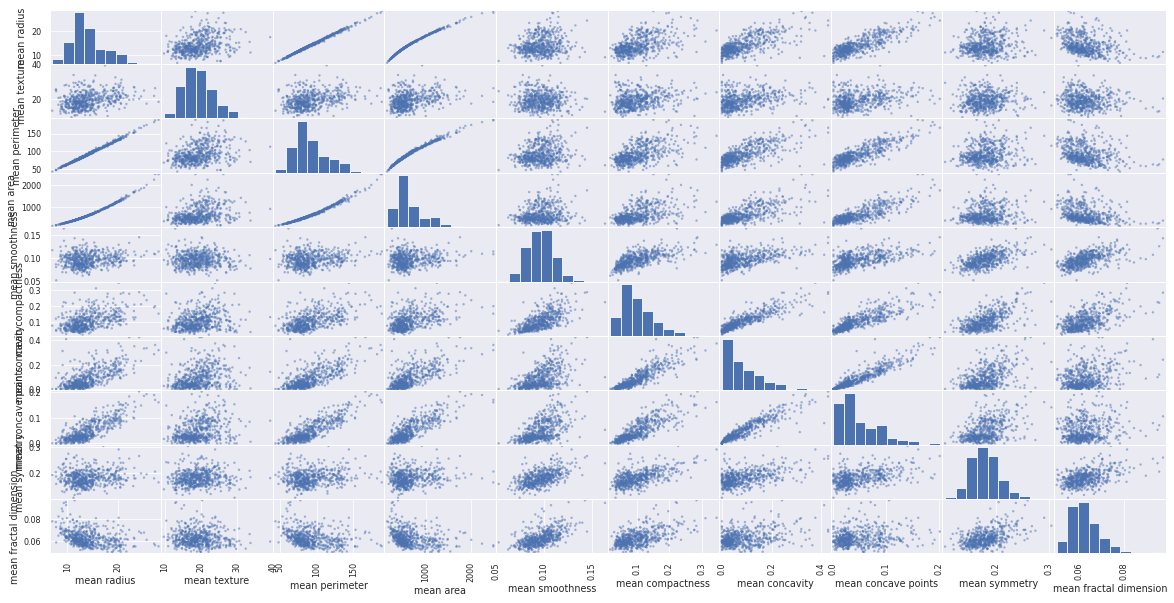

In [ ]:
sns.set(context = 'paper', style = 'darkgrid', rc={'figure.figsize':(20, 10)})

pd.plotting.scatter_matrix(data.iloc[:, 0:10]);

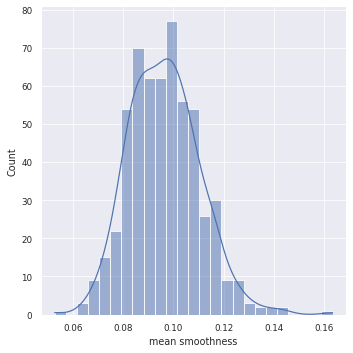

In [ ]:
sns.displot(data = data, x = 'mean smoothness', kde = True);

In [ ]:
data_sub = data.iloc[:, 0:5]

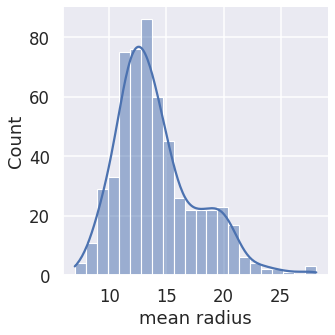

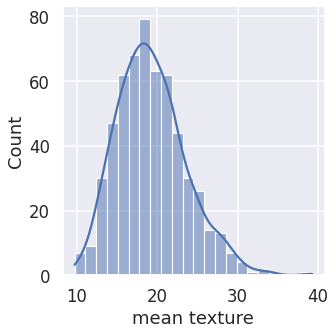

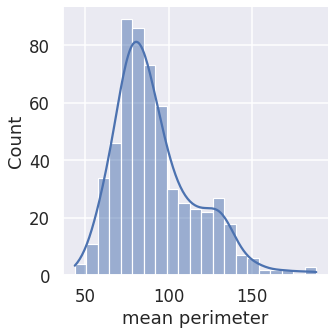

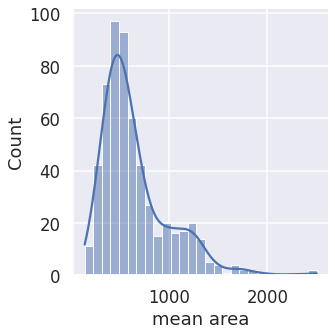

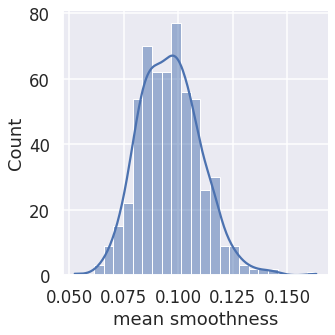

In [ ]:
for col in data_sub.columns:
  sns.displot(data = data_sub, x = data[col], kde = True)

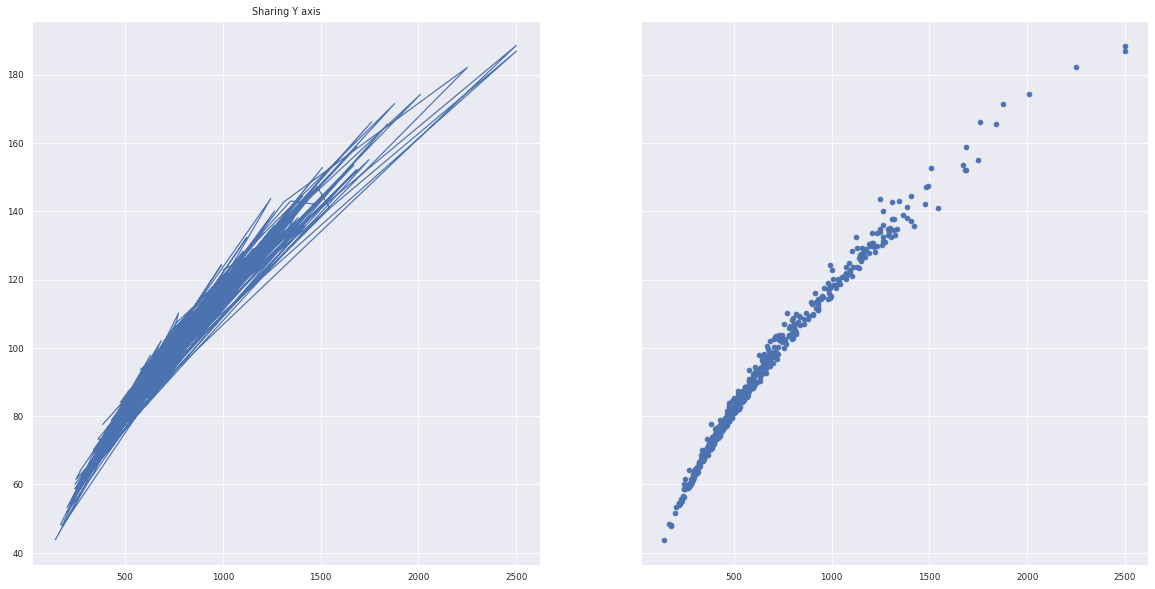

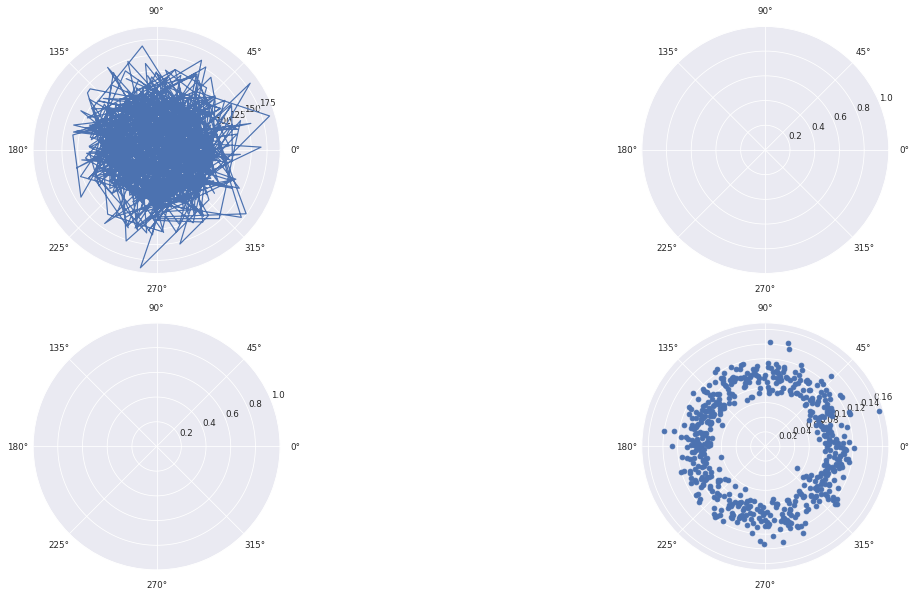

In [ ]:
# Create two subplots and unpack the output array immediately
x = data_sub['mean area']
y = data_sub['mean perimeter']

w = data_sub['mean smoothness']
z = data_sub['mean texture']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y )
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(z, w);

# Share a X axis with each column of subplots
# plt.subplots(2, 2, sharex='col')


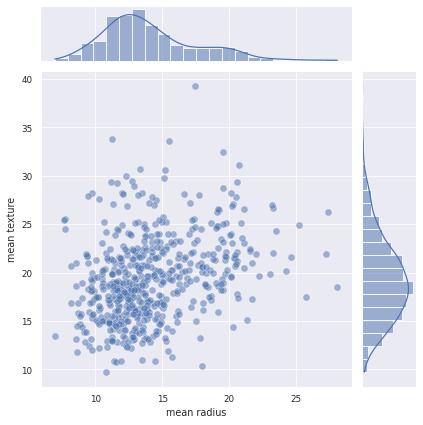

In [ ]:
g = sns.JointGrid(data = data_sub, x = 'mean radius', y = 'mean texture')
g.plot_joint(sns.scatterplot, s = 50, alpha = .5)
g.plot_marginals(sns.histplot, kde = True);

In [ ]:
# ejemplo de plotly express. Esto viene en la documentación

df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

In [ ]:
import plotly.graph_objects as go

size = [10, 20, 10, 20, 100, 60, 60, 40, 20, 40]
fig = go.Figure(data=[go.Scatter(
    x= list(range(0, 10)),
    y= list(range(0, 20, 2)),
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(70.**2),
        sizemin=4
    )
)])

fig.show()

In [ ]:
size = [10, 20, 10, 20, 100, 60, 60, 40, 20, 40]
fig = go.Figure(data=[go.Scatter(
    x= list(range(0, 10)),
    y= list(range(0, 20, 2)),
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(70.**2),
        sizemin=4,
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)', 
               'rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)', 
               'rgb(93, 164, 214)', 'rgb(255, 144, 14)'], 
    )
)])

fig.show()

In [ ]:
size = [10, 20, 10, 20, 100, 60, 60, 40, 20, 40]
fig = go.Figure(data=[go.Scatter(
    x= list(range(0, 10)),
    y= list(range(0, 20, 2)),
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(70.**2),
        sizemin=4,
        color= list(range(145, 165, 2)), 
        showscale = True
    )
)])

fig.show()

In [ ]:
data_sub.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'],
      dtype='object')

In [ ]:
fig = px.scatter_3d(data_sub, x = 'mean radius', y = 'mean perimeter', 
                    z = 'mean area', color = 'mean smoothness', 
                    size_max = 15, opacity = 0.5)
fig.show()